In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import shap

In [5]:
df=pd.read_excel(r'/Users/sarah/Documents/POLIMI/BABD/Project/E Commerce Dataset.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Missing value

In [8]:
nan_count = df.isna().sum()

# Display the results
print(nan_count)

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


Too many NaN value, more than 30% of the data.

In [11]:
df_eda = df.drop(['CustomerID'], axis=1)

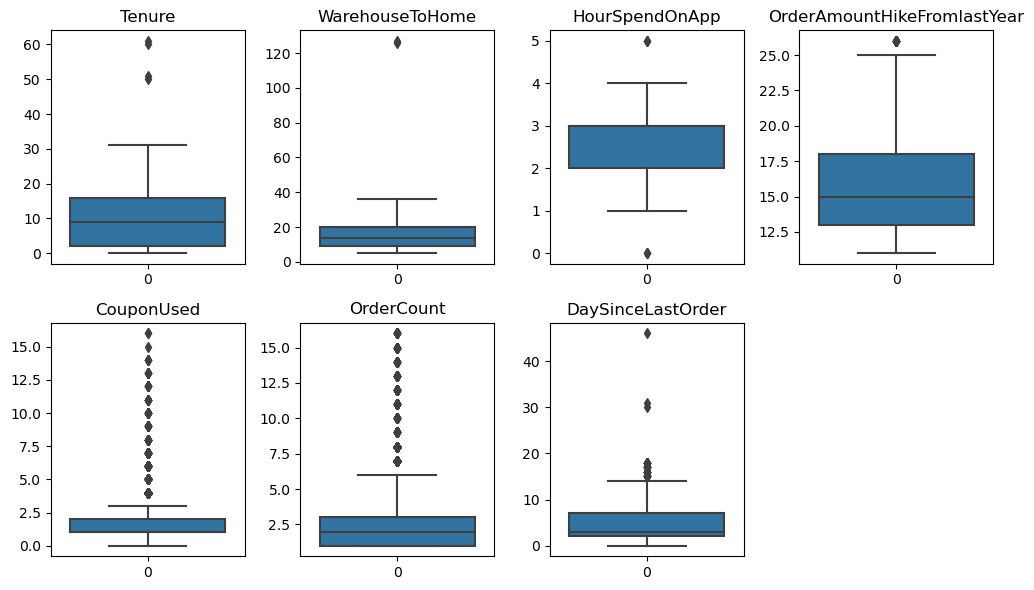

In [12]:
# Check the boxplots of columns with missing value
columns_to_plot = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                   'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

plt.figure(figsize=(10, 6))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i) 
    sns.boxplot(data=df_eda[col])
    plt.title(col)
plt.tight_layout()
plt.show()

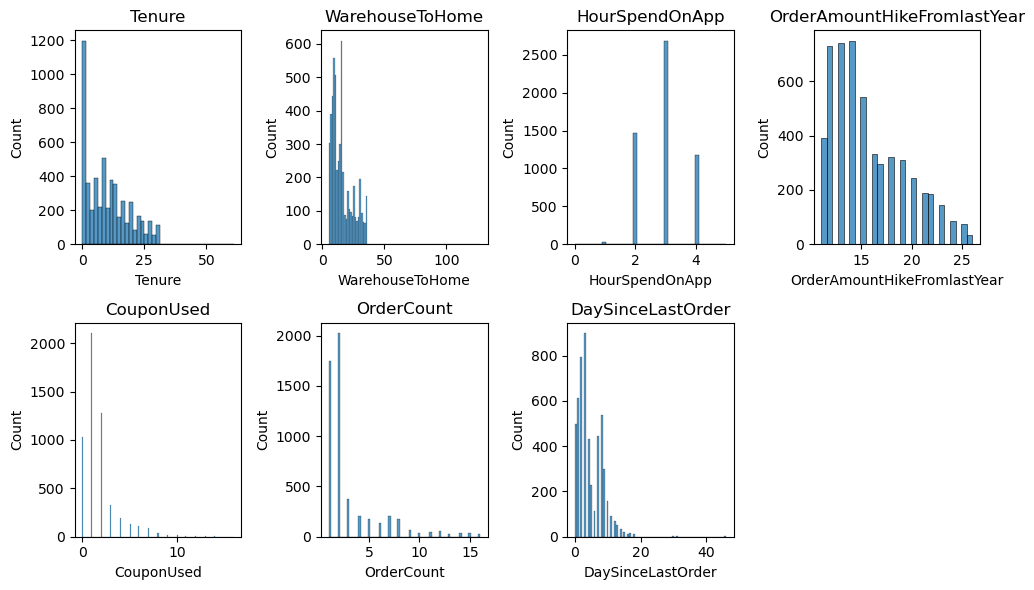

In [13]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i) 
    sns.histplot(data=df_eda[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Except for 'HourSpendOnApp,' which is approximately normally distributed, the remaining variables exhibit right-skewed distributions with a high frequency of lower values. For handling missing values, we will impute the median for 'HourSpendOnApp' and the mode (most frequent value) for the other variables.

In [14]:
# Impute missing values in 'HourSpendOnApp' with the median
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)

In [15]:
# Impute missing values with the most frequent value for each column
columns_to_impute = ['Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 
                     'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for column in columns_to_impute:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [16]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,1.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,1.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [17]:
df.to_excel(r'/Users/sarah/Documents/POLIMI/BABD/Project/ClearDataset.xlsx')

Use this clear dataset without missing value for the dashboard

## EDA

### Distribution

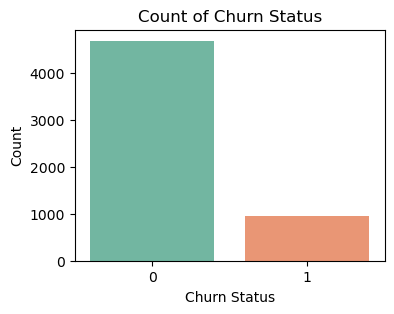

In [18]:
plt.figure(figsize=(4, 3))

sns.countplot(x='Churn', data=df_eda, palette='Set2')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Count of Churn Status')
plt.show()

In [19]:
# Define the columns
numerical = ['Tenure', 'CityTier', 'WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore',
             'NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Churn = 'Churn'

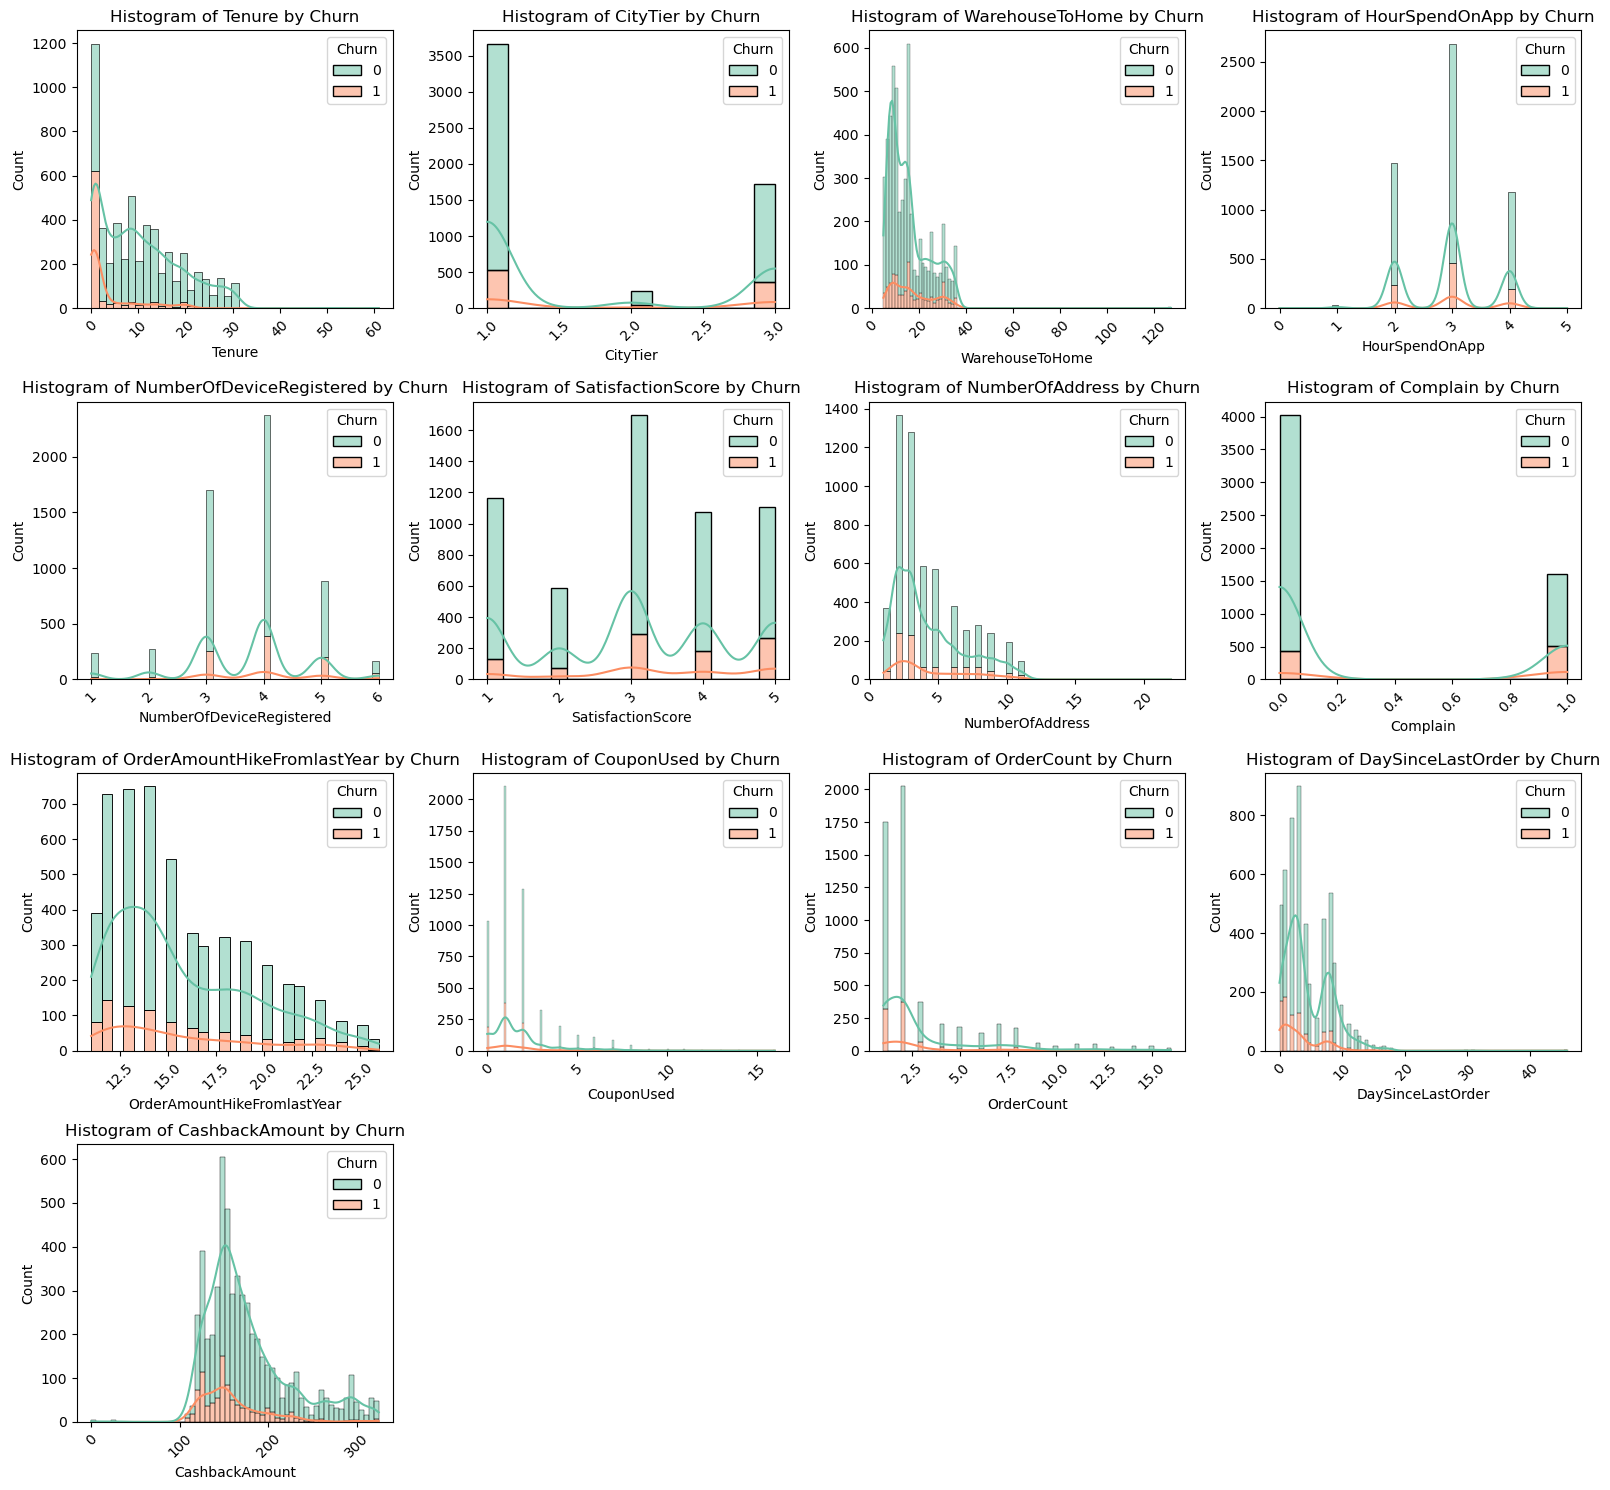

In [20]:
# Distribution of the numerical variables, grouped by Churn
plt.figure(figsize=(16, 15))

for i, col in enumerate(numerical, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(data=df_eda, x=col, hue='Churn', kde=True, multiple='stack', palette='Set2')
    plt.title(f'Histogram of {col} by Churn') 
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

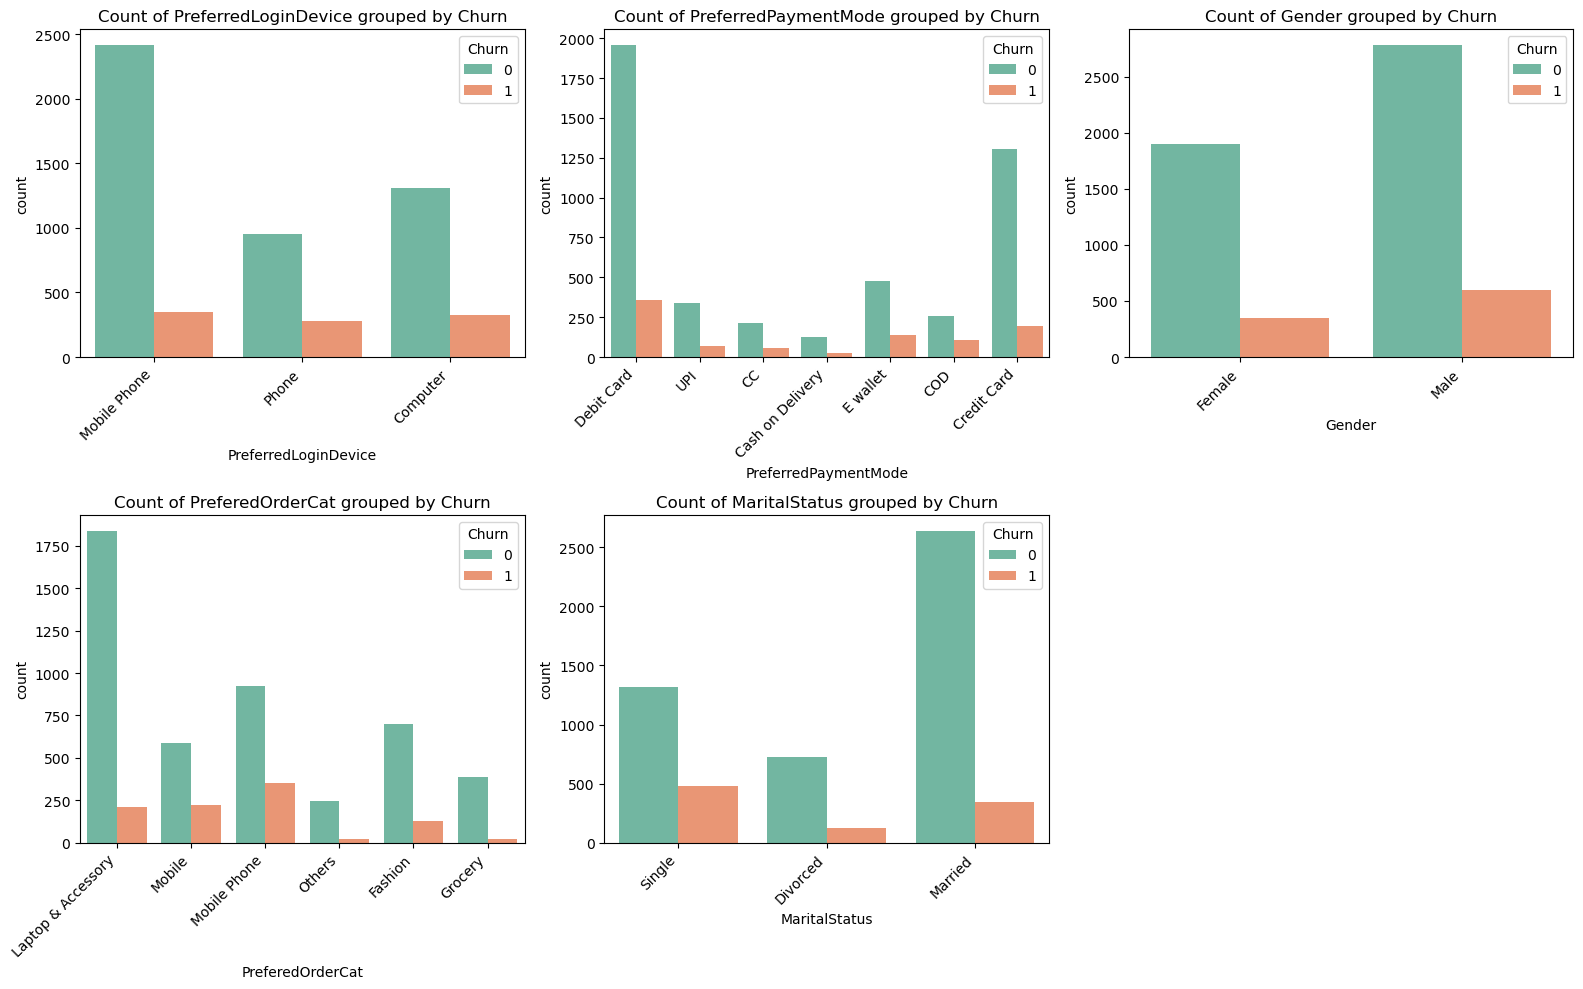

In [21]:
# Count of categorical variables, grouped by Churn status
plt.figure(figsize=(16, 10))

for i, col in enumerate(categorical, 1):
    plt.subplot(2, 3, i) 
    sns.countplot(x=col, hue='Churn', data=df_eda, palette="Set2")
    plt.title(f'Count of {col} grouped by Churn')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Encoding

In [22]:
df_en = df.copy()

for col in categorical:
    onehots = pd.get_dummies(df_en[col], prefix=col)
    df_en = df_en.join(onehots).drop(columns=[col])
    
df_en.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,False,False,False,True,False,False,False,False,False,True
1,50002,1,1.0,1,8.0,3.0,4,3,7,1,...,True,False,False,False,True,False,False,False,False,True
2,50003,1,1.0,1,30.0,2.0,4,3,6,1,...,True,False,False,False,True,False,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,True,False,False,True,False,False,False,False,False,True
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,True,False,False,False,True,False,False,False,False,True


In [23]:
df_en.to_csv(r'/Users/sarah/Documents/POLIMI/BABD/Project/Encoding.csv')

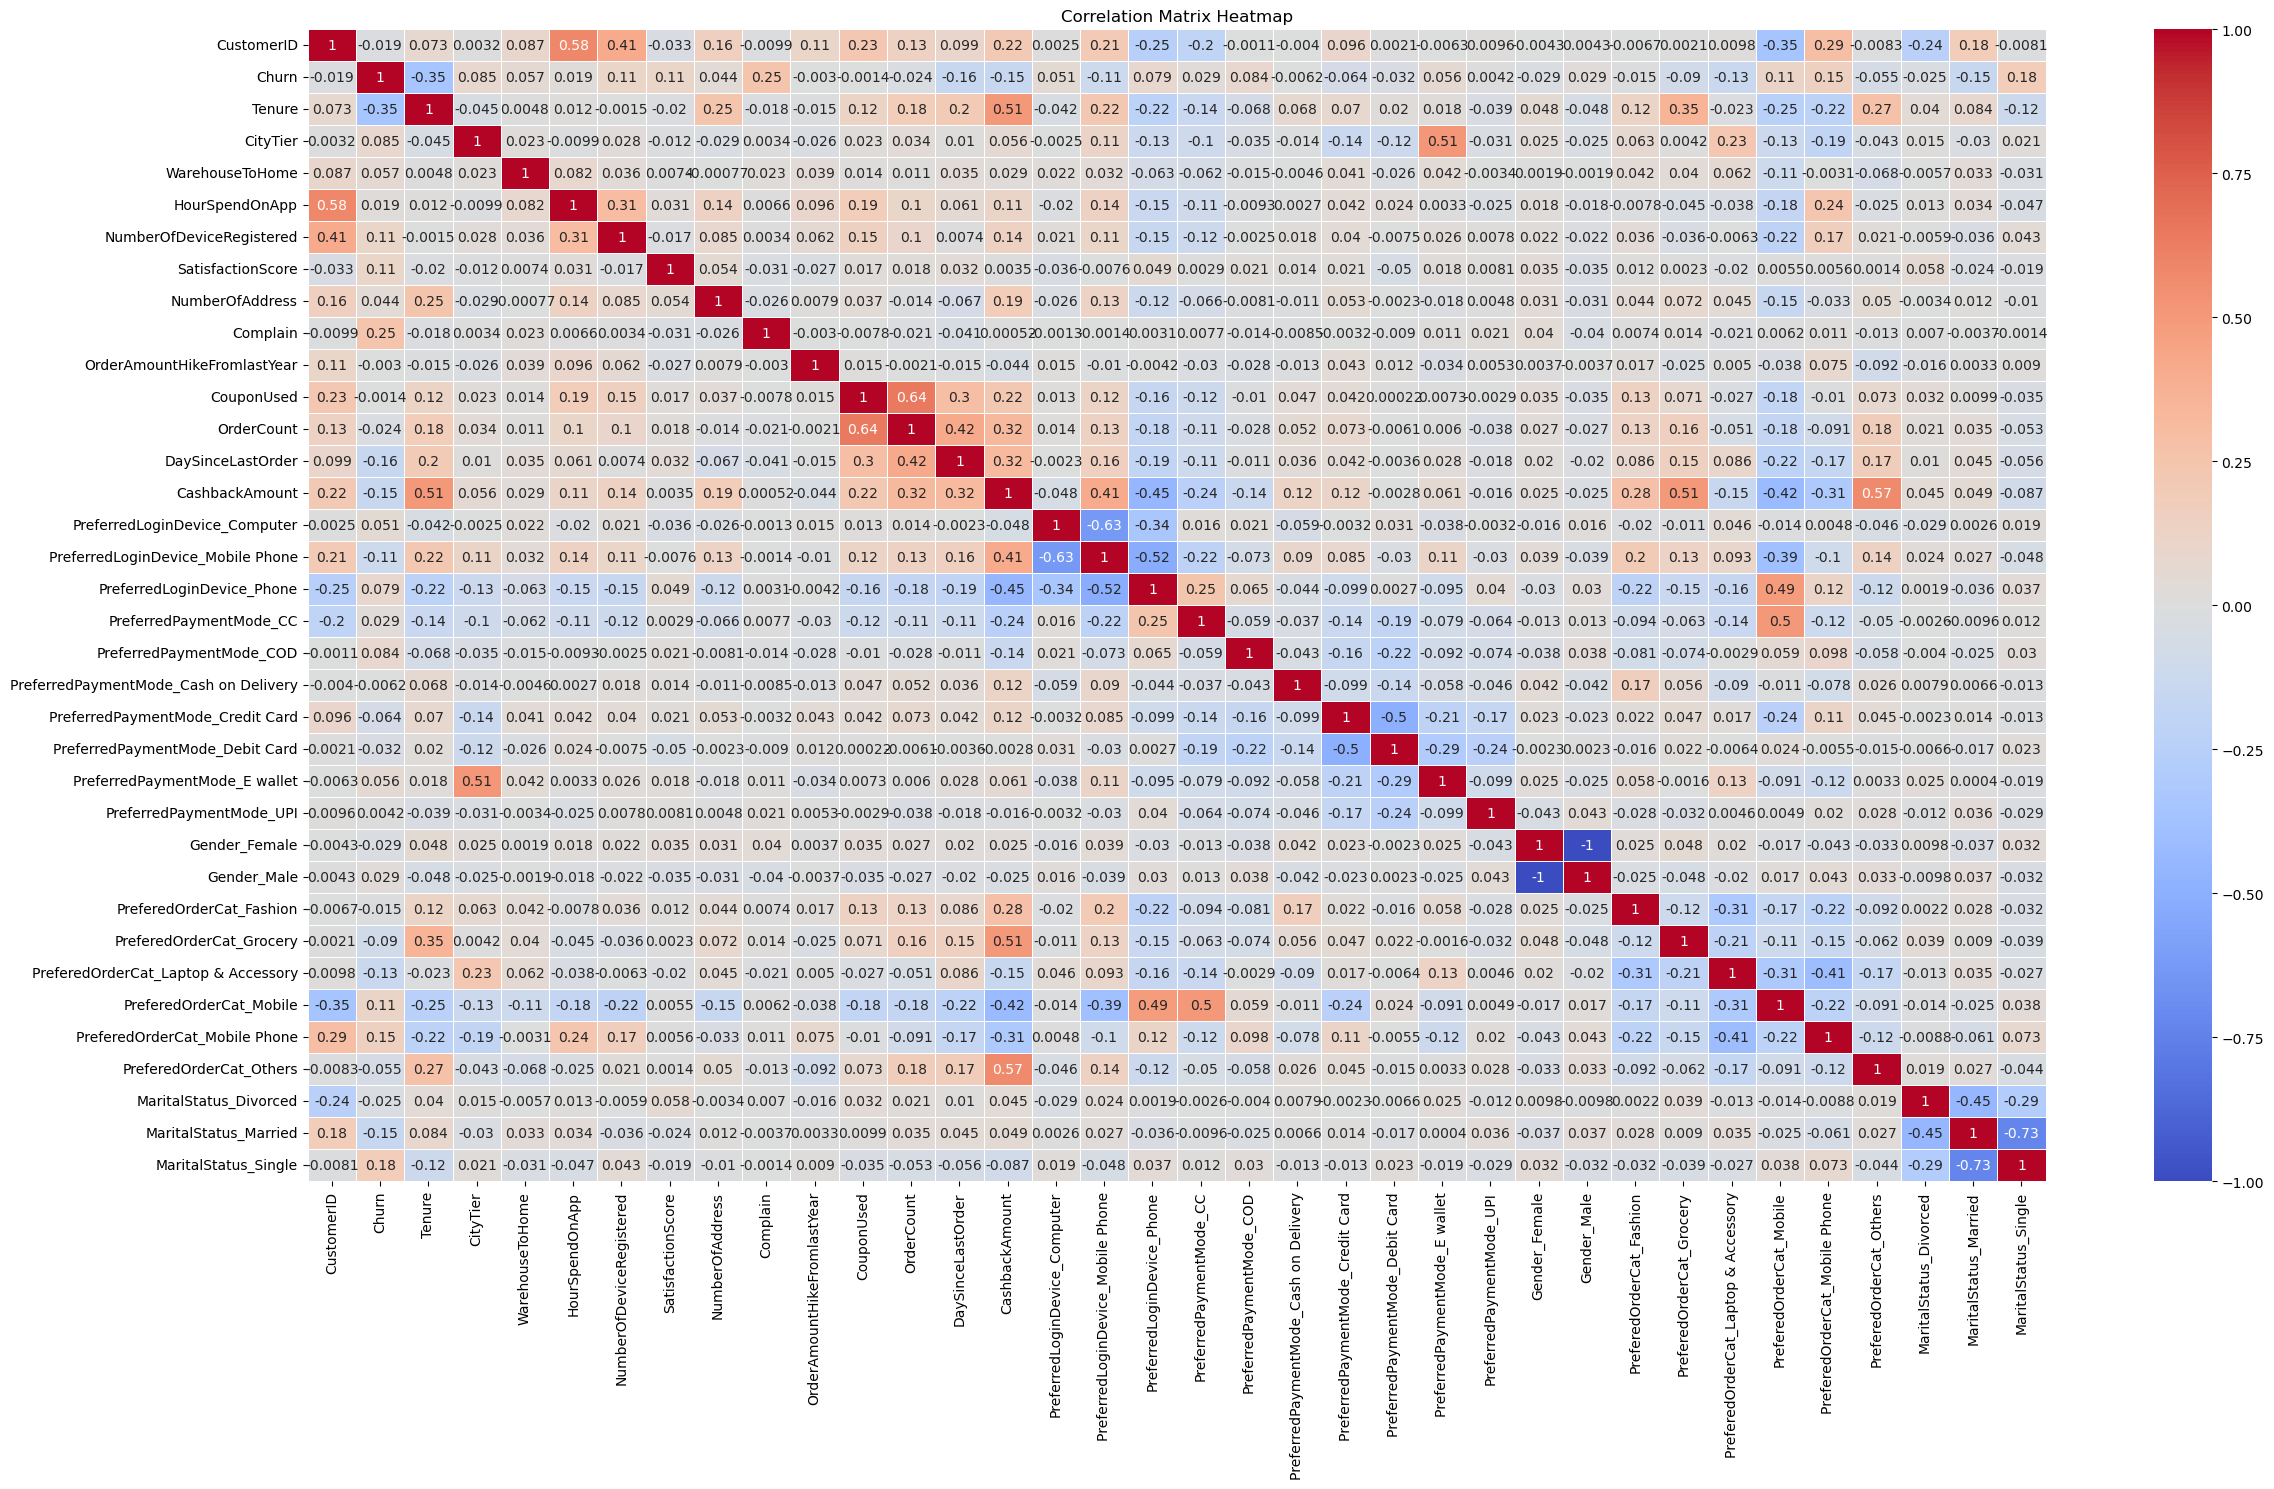

In [190]:
# Correlation Matrix
correlation_matrix = df_en.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [284]:
# Extract the correlation of all variables with 'Churn'
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Convert to DataFrame for better display
churn_correlation_df = churn_correlation.reset_index()
churn_correlation_df.columns = ['Variable', 'Correlation with Churn']

# Display the correlation table
churn_correlation_df

,Variable,Correlation with Churn
0,Churn,1.000000
1,Complain,0.250188
2,MaritalStatus_Single,0.180847
3,PreferedOrderCat_Mobile Phone,0.154387
4,PreferedOrderCat_Mobile,0.113364
5,NumberOfDeviceRegistered,0.107939
6,SatisfactionScore,0.105481
7,CityTier,0.084703
8,PreferredPaymentMode_COD,0.083933
9,PreferredLoginDevice_Phone,0.078916


In [453]:
# Extract the correlation of all variables with 'Churn'
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Convert to DataFrame for better display
churn_correlation_df = churn_correlation.reset_index()
churn_correlation_df.columns = ['Variable', 'Correlation with Churn']

# Separate positive and negative correlations
positive_correlation_df = churn_correlation_df[churn_correlation_df['Correlation with Churn'] > 0]
negative_correlation_df = churn_correlation_df[churn_correlation_df['Correlation with Churn'] < 0]

# Display the correlation tables
positive_correlation_df

,Variable,Correlation with Churn
0,Churn,1.000000
1,Complain,0.250188
2,MaritalStatus_Single,0.180847
3,PreferedOrderCat_Mobile Phone,0.154387
4,PreferedOrderCat_Mobile,0.113364
5,NumberOfDeviceRegistered,0.107939
6,SatisfactionScore,0.105481
7,CityTier,0.084703
8,PreferredPaymentMode_COD,0.083933
9,PreferredLoginDevice_Phone,0.078916


In [450]:
negative_correlation_df = negative_correlation_df.sort_values(by='Correlation with Churn')
negative_correlation_df

,Variable,Correlation with Churn
35,Tenure,-0.345379
34,DaySinceLastOrder,-0.155871
33,CashbackAmount,-0.154118
32,MaritalStatus_Married,-0.151024
31,PreferedOrderCat_Laptop & Accessory,-0.133353
30,PreferredLoginDevice_Mobile Phone,-0.111639
29,PreferedOrderCat_Grocery,-0.089575
28,PreferredPaymentMode_Credit Card,-0.064131
27,PreferedOrderCat_Others,-0.054903
26,PreferredPaymentMode_Debit Card,-0.032453


Low correlation features, even lower than **'CustomerID'**: **'CouponUsed'**, **'OrderAmountHikeFromlastYear'**, **'PreferredPaymentMode'**, **'HourSpendOnApp'**.

Based on the distribution, **'Gender'**, **'CityTier'** have no significant difference in dividing by churn.

In [318]:
df_dr = df_en.drop(['CustomerID', 'CouponUsed', 
                    'OrderAmountHikeFromlastYear', 'PreferredPaymentMode_Credit Card', 
                    'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_Cash on Delivery', 
                    'PreferredPaymentMode_UPI', 'PreferredPaymentMode_CC', 
                    'PreferredPaymentMode_COD', 'PreferredPaymentMode_E wallet', 
                    'HourSpendOnApp', 'Gender_Female', 
                    'Gender_Male', 'CityTier', 
                    'MaritalStatus_Divorced', 'PreferredLoginDevice_Computer', 
                    'PreferredLoginDevice_Phone', 'PreferedOrderCat_Fashion', 
                    'PreferedOrderCat_Others', 'NumberOfAddress',
                    'WarehouseToHome'
                   ], axis=1)

### Outliers

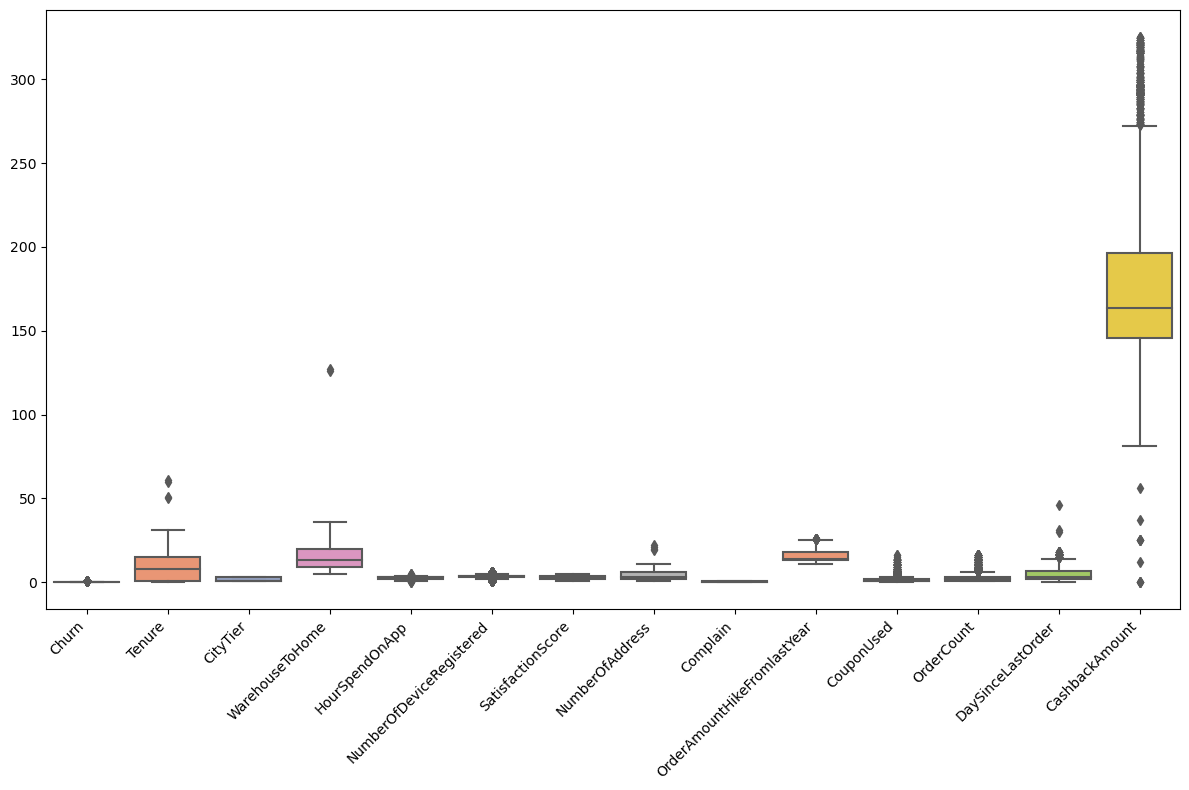

In [457]:
# Plot boxplots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(['CustomerID'], axis=1), palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

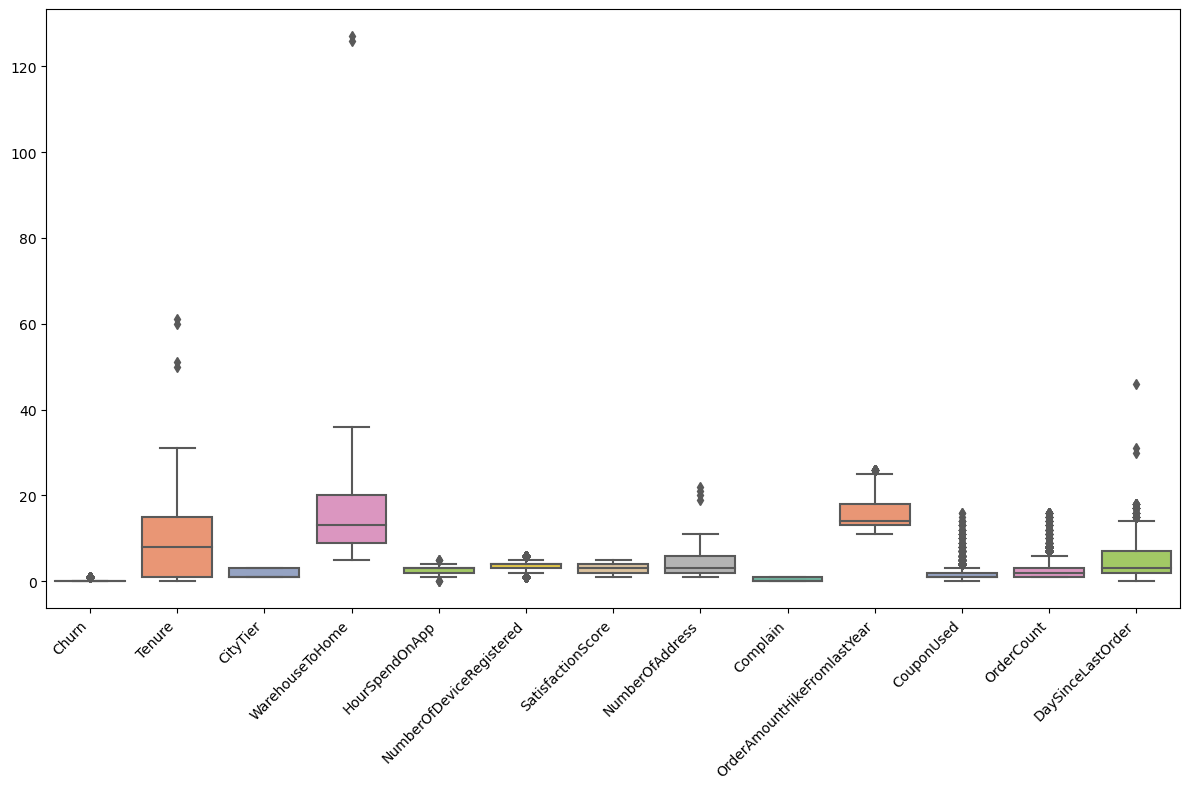

In [459]:
# Plot boxplots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(['CustomerID','CashbackAmount'], axis=1), palette="Set2") 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
columns_outliers = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

df_out = df_en.copy()

for col in columns_outliers:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers for the current column
    df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    
df_out.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,False,False,False,True,False,False,False,False,False,True
1,50002,1,1.0,1,8.0,3.0,4,3,7,1,...,True,False,False,False,True,False,False,False,False,True
2,50003,1,1.0,1,30.0,2.0,4,3,6,1,...,True,False,False,False,True,False,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,True,False,False,True,False,False,False,False,False,True
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,True,False,False,False,True,False,False,False,False,True


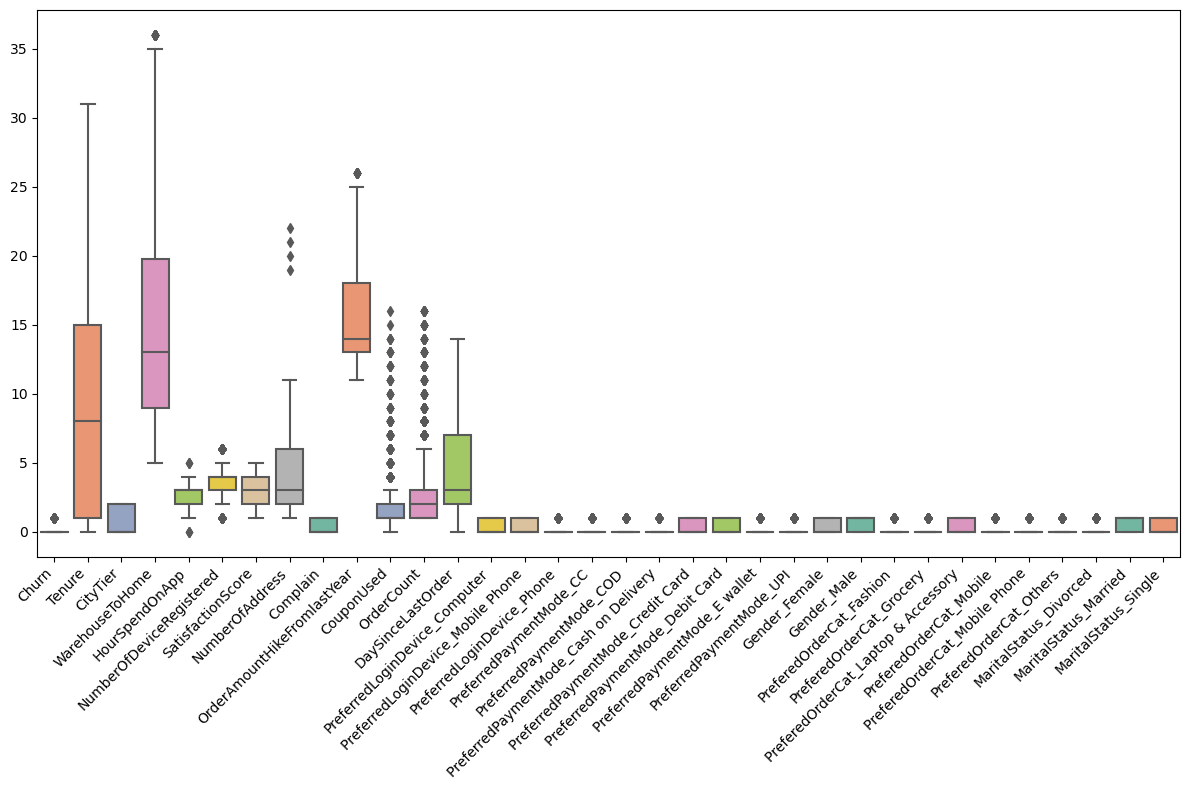

In [461]:
# Plot boxplots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_out.drop(['CustomerID','CashbackAmount'], axis=1), palette="Set2") 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Machine learning

In [25]:
df_ml = df_out.copy().drop(['CustomerID'], axis=1)

### Preprocessing

In [26]:
scaler_standard = StandardScaler()
df_ml_standardized = scaler_standard.fit_transform(df_ml.drop(columns=['Churn']))
df_ml_standardized = pd.DataFrame(df_ml_standardized, columns=df_ml.drop(columns=['Churn']).columns)

In [27]:
# Prepare features for each dataframe
y = df_ml['Churn'] 
X_standardized = df_ml_standardized

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

### Models

In [29]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, f1, recall

In [30]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'MLP': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = pd.DataFrame(columns=['Model', 'DataFrame', 'Accuracy', 'F1 Score', 'Recall Score'])

for model_name, model in models.items():
    accuracy, f1, recall = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
    current_result = pd.DataFrame({'Model': [model_name], 'DataFrame': ['Standardized'], 
                                   'Accuracy': [accuracy], 'F1 Score': [f1], 'Recall Score': [recall]})
    results = pd.concat([results, current_result], ignore_index=True)

results

/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,DataFrame,Accuracy,F1 Score,Recall Score
0,Logistic Regression,Standardized,0.890386,0.630303,0.533333
1,SVC,Standardized,0.906559,0.677019,0.558974
2,MLP,Standardized,0.961366,0.886544,0.861538
3,Random Forest,Standardized,0.955076,0.858757,0.779487
4,Decision Tree,Standardized,0.958670,0.882653,0.887179
5,Gradient Boosting,Standardized,0.902965,0.682353,0.594872


### Cross Validation for the best 3 models

In [36]:
mlp_model = MLPClassifier()

mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (150,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.01],
    'max_iter': [800]
}

mlp_grid_search = GridSearchCV(
    estimator=mlp_model,
    param_grid=mlp_param_grid,
    cv=10,
    scoring='recall', 
    return_train_score=True 
)

mlp_grid_search.fit(X_train, y_train)

best_recall = mlp_grid_search.best_score_

y_train_pred = mlp_grid_search.best_estimator_.predict(X_train)

best_accuracy = accuracy_score(y_train, y_train_pred)

print("Best Parameters for MLP:", mlp_grid_search.best_params_)
print("Best Recall Score for MLP:", best_recall)
print("Train Accuracy for MLP:", best_accuracy)

Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (150,), 'max_iter': 800}
Best Recall Score for MLP: 0.8930630630630632
Train Accuracy for MLP: 1.0


In [37]:
y_test_pred = mlp_grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9829290206648698


In [31]:
rf_model = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=10,
    scoring='recall', 
    return_train_score=True 
)

rf_grid_search.fit(X_train, y_train)

best_recall = rf_grid_search.best_score_

y_train_pred = rf_grid_search.best_estimator_.predict(X_train)

best_accuracy = accuracy_score(y_train, y_train_pred)

print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Recall Score for Random Forest:", best_recall)
print("Train Accuracy for Random Forest:", best_accuracy)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best Recall Score for Random Forest: 0.8141981981981982
Train Accuracy for Random Forest: 1.0


In [32]:
y_test_pred = rf_grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.958670260557053


In [412]:
dt_model = DecisionTreeClassifier()

# Define the parameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Set up Grid Search with cross-validation
dt_grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    cv=10,
    scoring='recall',  # Use a list for multiple metrics
    return_train_score=True  # Optional: if you want to see train scores
)
dt_grid_search.fit(X_train, y_train)

# Best parameters found for Random Forest
print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)


# Get the best recall score
best_recall = dt_grid_search.best_score_
print("Best Recall Score for Decision Tree:", best_recall)

# Use the best estimator to predict on the training set (or validation set if you have one)
y_train_pred = dt_grid_search.best_estimator_.predict(X_train)

# Calculate accuracy based on predictions
best_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy for Decision Tree:", best_accuracy)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Recall Score for Decision Tree: 0.8743063063063063
Train Accuracy for Decision Tree: 1.0


In [413]:
y_test_pred = dt_grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.945193171608266


In [385]:
def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring='recall', n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, label=f'{model_name} Training Score')
    plt.plot(train_sizes, test_scores_mean, label=f'{model_name} Validation Score')

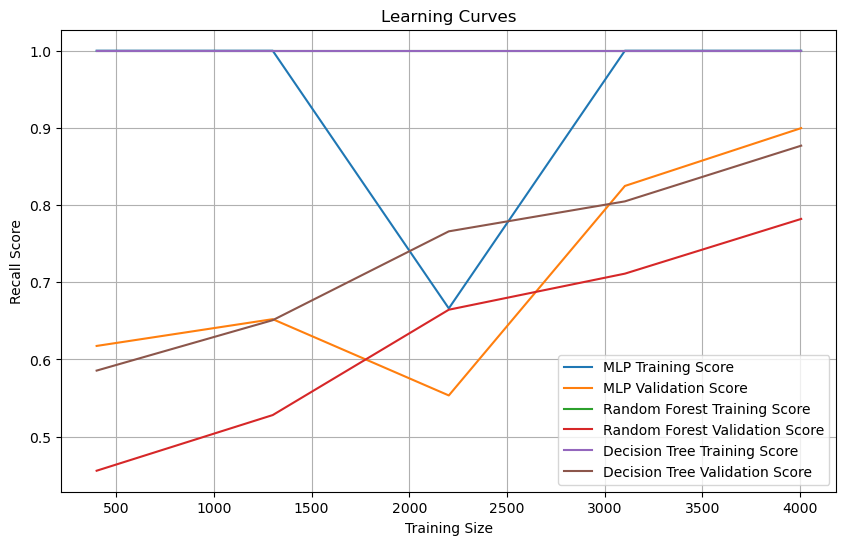

In [414]:
# Plotting the learning curves for MLP, Random Forest, and Decision Tree
plt.figure(figsize=(10, 6))

# MLP
plot_learning_curve(mlp_grid_search.best_estimator_, X_train, y_train, "MLP")

# Random Forest
plot_learning_curve(rf_grid_search.best_estimator_, X_train, y_train, "Random Forest")

# Decision Tree
plot_learning_curve(dt_grid_search.best_estimator_, X_train, y_train, "Decision Tree")

# Final plot adjustments
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Recall Score')
plt.legend()
plt.grid(True)
plt.show()

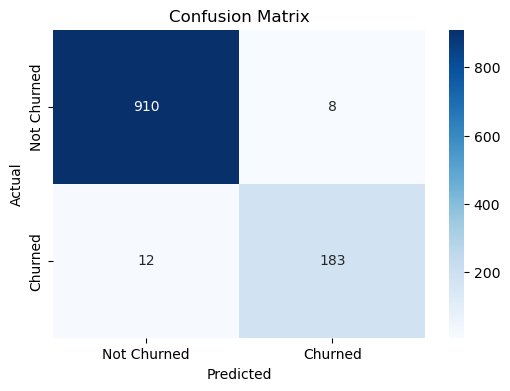

In [415]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = mlp_grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

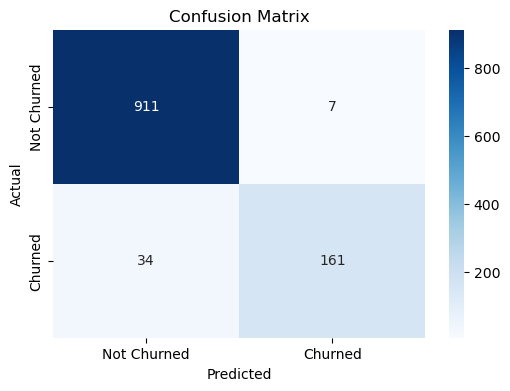

In [416]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = rf_grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

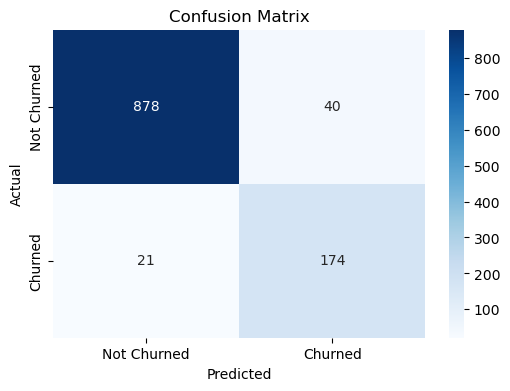

In [417]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = dt_grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [420]:
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp_grid_search.best_estimator_, X_train, y_train, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,Tenure,0.100067
7,Complain,0.068367
6,NumberOfAddress,0.046529
5,SatisfactionScore,0.036891
2,WarehouseToHome,0.027477
1,CityTier,0.023882
11,DaySinceLastOrder,0.021613
33,MaritalStatus_Single,0.019411
27,PreferedOrderCat_Laptop & Accessory,0.019074
25,PreferedOrderCat_Fashion,0.018625


In [76]:
background = shap.kmeans(X_train, 10)

explainer = shap.KernelExplainer(mlp_model.predict)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)

Provided model function fails when applied to the provided data set.


NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [33]:
best_rf_model = rf_grid_search.best_estimator_

importance = best_rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,Tenure,0.206905
12,CashbackAmount,0.086060
2,WarehouseToHome,0.067344
6,NumberOfAddress,0.062042
7,Complain,0.060740
11,DaySinceLastOrder,0.058541
8,OrderAmountHikeFromlastYear,0.054543
5,SatisfactionScore,0.044385
4,NumberOfDeviceRegistered,0.037071
10,OrderCount,0.030606


In [ ]:
# Create SHAP TreeExplainer for the trained Random Forest model
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for the test dataset (X_test)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, feature_names=X_train.columns)

In [90]:
top_features = [
    'Tenure',
    'Complain',
    'DaySinceLastOrder',
    'SatisfactionScore',
    'NumberOfAddress',
    'NumberOfDeviceRegistered',
    'WarehouseToHome',
    'CashbackAmount',
    'MaritalStatus_Single',
    'CityTier'
#    'MaritalStatus_Married',
#    'PreferredLoginDevice_Mobile Phone',
#    'PreferedOrderCat_Laptop & Accessory',
#    'PreferedOrderCat_Mobile Phone',
#    'PreferedOrderCat_Mobile',
]

# Create a new DataFrame with only the top features
X_train_top = X_train[top_features]

top_features_table = pd.DataFrame({'Top Feature': top_features})
top_features_table

,Top Feature
0,Tenure
1,Complain
2,DaySinceLastOrder
3,SatisfactionScore
4,NumberOfAddress
5,NumberOfDeviceRegistered
6,WarehouseToHome
7,CashbackAmount
8,MaritalStatus_Single
9,CityTier


In [42]:
# Fit your model again using only the selected features
mlp_grid_search.fit(X_train_top, y_train)

best_recall = mlp_grid_search.best_score_
print("Best Recall Score for MLP:", best_recall)

y_train_pred = mlp_grid_search.best_estimator_.predict(X_train_top)

best_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy for MLP:", best_accuracy)

/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sarah/anaconda3/lib/python3.1

Best Recall Score for MLP: 0.7539639639639638
Train Accuracy for MLP: 0.9973027646662171


/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


top_features = [
    'Tenure', 
    'Complain', 
    'NumberOfAddress', 
    'SatisfactionScore', 
    'WarehouseToHome', 
    'CityTier', 
    'DaySinceLastOrder', 
    'MaritalStatus_Single', 
    'PreferedOrderCat_Laptop & Accessory', 
    'PreferedOrderCat_Fashion'
]

直接 fit in 原本 model

Best Recall Score for MLP: 0.7793333333333333

Train Accuracy for MLP: 0.9867445517861155

In [43]:
mlp_param_grid_top = {
    'hidden_layer_sizes': [(100,), (150,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.01],
    'max_iter': [1000]
}

mlp_grid_search_top = GridSearchCV(
    estimator=mlp_model,
    param_grid=mlp_param_grid_top,
    cv=10,
    scoring='recall', 
    return_train_score=True 
)

mlp_grid_search_top.fit(X_train_top, y_train)

print("Best Parameters for MLP:", mlp_grid_search_top.best_params_)

best_recall = mlp_grid_search_top.best_score_
print("Best Recall Score for MLP:", best_recall)

y_train_pred = mlp_grid_search_top.best_estimator_.predict(X_train_top)

best_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy for MLP:", best_accuracy)

/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sarah/anaconda3/lib/pytho

Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 1000}
Best Recall Score for MLP: 0.7833333333333334
Train Accuracy for MLP: 0.99842661272196


/Users/sarah/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


top_features = [
    'Tenure', 
    'Complain', 
    'NumberOfAddress', 
    'SatisfactionScore', 
    'WarehouseToHome', 
    'CityTier', 
    'DaySinceLastOrder', 
    'MaritalStatus_Single', 
    'PreferedOrderCat_Laptop & Accessory', 
    'PreferedOrderCat_Fashion'
]

再一次CV

Best Recall Score for MLP: 0.8047207207207207

Train Accuracy for MLP: 0.9905639182206246

## Try the python code of prediction in Python
### Prepare

In [140]:
col=df.columns.to_list()
col

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [141]:
df_dic = df.drop(columns=['CustomerID'])

In [142]:
col_dic=df_dic.columns.to_list()
col_dic

['Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [143]:
chu = [df_dic['Churn'].to_list()]
ten = [df_dic['Tenure'].to_list()]
preld = [df_dic['PreferredLoginDevice'].to_list()]
cit = [df_dic['CityTier'].to_list()]
war = [df_dic['WarehouseToHome'].to_list()]
prepm = [df_dic['PreferredPaymentMode'].to_list()]
gen = [df_dic['Gender'].to_list()]
hou = [df_dic['HourSpendOnApp'].to_list()]
numd = [df_dic['NumberOfDeviceRegistered'].to_list()]
preoc = [df_dic['PreferedOrderCat'].to_list()]
sat = [df_dic['SatisfactionScore'].to_list()]
mar = [df_dic['MaritalStatus'].to_list()]
numa = [df_dic['NumberOfAddress'].to_list()]
com = [df_dic['Complain'].to_list()]
orda = [df_dic['OrderAmountHikeFromlastYear'].to_list()]
cou = [df_dic['CouponUsed'].to_list()]
ord = [df_dic['OrderCount'].to_list()]
day = [df_dic['DaySinceLastOrder'].to_list()]
cas = [df_dic['CashbackAmount'].to_list()]
prepm

[['Debit Card',
  'UPI',
  'Debit Card',
  'Debit Card',
  'CC',
  'Debit Card',
  'Cash on Delivery',
  'CC',
  'E wallet',
  'Debit Card',
  'Cash on Delivery',
  'Debit Card',
  'COD',
  'CC',
  'Credit Card',
  'UPI',
  'Debit Card',
  'E wallet',
  'Debit Card',
  'Debit Card',
  'Debit Card',
  'Credit Card',
  'E wallet',
  'Debit Card',
  'Debit Card',
  'Credit Card',
  'E wallet',
  'E wallet',
  'Debit Card',
  'E wallet',
  'COD',
  'Credit Card',
  'CC',
  'E wallet',
  'E wallet',
  'CC',
  'CC',
  'CC',
  'Debit Card',
  'CC',
  'Debit Card',
  'Debit Card',
  'Debit Card',
  'Debit Card',
  'Debit Card',
  'COD',
  'COD',
  'CC',
  'CC',
  'Debit Card',
  'Debit Card',
  'Debit Card',
  'Debit Card',
  'E wallet',
  'Debit Card',
  'Credit Card',
  'CC',
  'E wallet',
  'Credit Card',
  'Credit Card',
  'CC',
  'Credit Card',
  'Credit Card',
  'Debit Card',
  'Credit Card',
  'Debit Card',
  'CC',
  'Debit Card',
  'CC',
  'Credit Card',
  'Debit Card',
  'Credit Card'

In [144]:
# Creating Dictionary
dic = {
    col_dic[0]: chu,
    col_dic[1]: ten,
    col_dic[2]: preld,
    col_dic[3]: cit,
    col_dic[4]: war,
    col_dic[5]: prepm,
    col_dic[6]: gen,
    col_dic[7]: hou,
    col_dic[8]: numd,
    col_dic[9]: preoc,
    col_dic[10]: sat,
    col_dic[11]: mar,
    col_dic[12]: numa,
    col_dic[13]: com,
    col_dic[14]: orda,
    col_dic[15]: cou,
    col_dic[16]: ord,
    col_dic[17]: day,
    col_dic[18]: cas
}


In [145]:
df_dic=pd.DataFrame(dic)
df_dic

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 13.0,...","[Mobile Phone, Phone, Phone, Phone, Phone, Com...","[3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, ...","[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 6.0, ...","[Debit Card, UPI, Debit Card, Debit Card, CC, ...","[Female, Male, Male, Male, Male, Female, Male,...","[3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, ...","[3, 4, 4, 4, 3, 5, 3, 3, 4, 5, 3, 4, 3, 4, 4, ...","[Laptop & Accessory, Mobile, Mobile, Laptop & ...","[2, 3, 3, 5, 5, 5, 2, 2, 3, 3, 3, 3, 3, 3, 2, ...","[Single, Single, Single, Single, Single, Singl...","[9, 7, 6, 8, 3, 2, 4, 3, 2, 2, 2, 10, 2, 1, 2,...","[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, ...","[11.0, 15.0, 14.0, 23.0, 11.0, 22.0, 14.0, 16....","[1.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 2.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 1.0, 2.0, 1.0, ...","[5.0, 0.0, 3.0, 3.0, 3.0, 7.0, 0.0, 0.0, 2.0, ...","[159.93, 120.9, 120.28, 134.07, 129.6, 139.19,..."


In [147]:
df_dic.to_excel(r'/Users/sarah/Documents/POLIMI/BABD/Project/dic.xlsx')

### Drop categorical variebles and adjust the datatypes into the same

In [178]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [197]:
df_int = df.copy()
df_int = df_int.drop(['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'Gender'], axis=1)

# 将浮点列转换为整型
float_cols = df_int.select_dtypes(include=['float']).columns
df_int[float_cols] = df_int[float_cols].astype(int)

# 查看数据类型
print(df_int.dtypes)

CustomerID                     int64
Churn                          int64
Tenure                         int64
CityTier                       int64
WarehouseToHome                int64
HourSpendOnApp                 int64
NumberOfDeviceRegistered       int64
SatisfactionScore              int64
NumberOfAddress                int64
Complain                       int64
OrderAmountHikeFromlastYear    int64
CouponUsed                     int64
OrderCount                     int64
DaySinceLastOrder              int64
CashbackAmount                 int64
dtype: object


In [200]:
df_int = df_int.drop(columns=['CustomerID'])

In [201]:
col_dic_int = df_int.columns.to_list()
col_dic_int

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [202]:
df_int

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,3,6,3,3,2,9,1,11,1,1,5,159
1,1,1,1,8,3,4,3,7,1,15,0,1,0,120
2,1,1,1,30,2,4,3,6,1,14,0,1,3,120
3,1,0,3,15,2,4,5,8,0,23,0,1,3,134
4,1,0,1,12,3,3,5,3,0,11,1,1,3,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10,1,30,3,2,1,6,0,18,1,2,4,150
5626,0,13,1,13,3,5,5,6,0,16,1,2,3,224
5627,0,1,1,11,3,2,4,3,1,21,1,2,4,186
5628,0,23,3,9,4,5,4,4,0,15,2,2,9,178


In [208]:
chu = [df_int['Churn'].to_list()]
ten = [df_int['Tenure'].to_list()]
cit = [df_int['CityTier'].to_list()]
war = [df_int['WarehouseToHome'].to_list()]
hou = [df_int['HourSpendOnApp'].to_list()]
numd = [df_int['NumberOfDeviceRegistered'].to_list()]
sat = [df_int['SatisfactionScore'].to_list()]
numa = [df_int['NumberOfAddress'].to_list()]
com = [df_int['Complain'].to_list()]
orda = [df_int['OrderAmountHikeFromlastYear'].to_list()]
cou = [df_int['CouponUsed'].to_list()]
ord = [df_int['OrderCount'].to_list()]
day = [df_int['DaySinceLastOrder'].to_list()]
cas = [df_int['CashbackAmount'].to_list()]
cas

[[159,
  120,
  120,
  134,
  129,
  139,
  120,
  122,
  126,
  122,
  295,
  153,
  134,
  133,
  196,
  120,
  129,
  157,
  160,
  149,
  161,
  203,
  116,
  145,
  206,
  142,
  172,
  123,
  123,
  189,
  143,
  161,
  133,
  208,
  122,
  123,
  120,
  127,
  194,
  125,
  299,
  124,
  194,
  186,
  130,
  130,
  123,
  120,
  130,
  150,
  142,
  125,
  111,
  204,
  122,
  139,
  123,
  131,
  136,
  144,
  127,
  290,
  287,
  195,
  237,
  299,
  122,
  159,
  120,
  267,
  135,
  144,
  152,
  165,
  162,
  142,
  168,
  138,
  127,
  166,
  176,
  123,
  121,
  148,
  193,
  204,
  184,
  199,
  224,
  126,
  235,
  166,
  120,
  188,
  159,
  159,
  126,
  221,
  206,
  143,
  121,
  0,
  179,
  187,
  123,
  132,
  292,
  122,
  295,
  124,
  260,
  127,
  290,
  139,
  137,
  122,
  144,
  130,
  133,
  292,
  236,
  129,
  159,
  139,
  164,
  200,
  209,
  123,
  165,
  169,
  148,
  125,
  294,
  127,
  134,
  127,
  152,
  121,
  268,
  134,
  166,
  155,
  140,
 

In [211]:
# Creating Dictionary
dic_int = {
    col_dic_int[0]: chu,
    col_dic_int[1]: ten,
    col_dic_int[2]: cit,
    col_dic_int[3]: war,
    col_dic_int[4]: hou,
    col_dic_int[5]: numd,
    col_dic_int[6]: sat,
    col_dic_int[7]: numa,
    col_dic_int[8]: com,
    col_dic_int[9]: orda,
    col_dic_int[10]: cou,
    col_dic_int[11]: ord,
    col_dic_int[12]: day,
    col_dic_int[13]: cas
}

In [212]:
df_int=pd.DataFrame(dic_int)
df_int

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 1, 1, 0, 0, 0, 1, 1, 13, 1, 4, 11, 0, 0, 9...","[3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, ...","[6, 8, 30, 15, 12, 22, 11, 6, 9, 31, 18, 6, 11...","[3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, ...","[3, 4, 4, 4, 3, 5, 3, 3, 4, 5, 3, 4, 3, 4, 4, ...","[2, 3, 3, 5, 5, 5, 2, 2, 3, 3, 3, 3, 3, 3, 2, ...","[9, 7, 6, 8, 3, 2, 4, 3, 2, 2, 2, 10, 2, 1, 2,...","[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, ...","[11, 15, 14, 23, 11, 22, 14, 16, 14, 12, 14, 1...","[1, 0, 0, 0, 1, 4, 0, 2, 0, 1, 9, 0, 2, 0, 0, ...","[1, 1, 1, 1, 1, 6, 1, 2, 1, 1, 15, 1, 2, 1, 4,...","[5, 0, 3, 3, 3, 7, 0, 0, 2, 1, 8, 0, 2, 0, 7, ...","[159, 120, 120, 134, 129, 139, 120, 122, 126, ..."


In [213]:
df_int.to_excel(r'/Users/sarah/Documents/POLIMI/BABD/Project/dic_int.xlsx')

### Use the most important features

In [67]:
df_ml

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,False,False,False,True,False,False,False,False,False,True
1,1,1.0,1,8.0,3.0,4,3,7,1,15.0,...,True,False,False,False,True,False,False,False,False,True
2,1,1.0,1,30.0,2.0,4,3,6,1,14.0,...,True,False,False,False,True,False,False,False,False,True
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,True,False,False,True,False,False,False,False,False,True
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,3.0,2,1,6,0,18.0,...,True,False,False,True,False,False,False,False,True,False
5626,0,13.0,1,13.0,3.0,5,5,6,0,16.0,...,True,True,False,False,False,False,False,False,True,False
5627,0,1.0,1,11.0,3.0,2,4,3,1,21.0,...,True,False,False,True,False,False,False,False,True,False
5628,0,23.0,3,9.0,4.0,5,4,4,0,15.0,...,True,False,False,True,False,False,False,False,True,False


In [68]:
df_top = df_ml.copy()
df_top = df_top[[
    'Churn',
    'Tenure',
    'Complain',
    'DaySinceLastOrder',
    'SatisfactionScore',
    'NumberOfAddress',
    'NumberOfDeviceRegistered',
    'WarehouseToHome',
    'CashbackAmount',
    'MaritalStatus_Single',
    'CityTier']]

df_top.dtypes

Churn                         int64
Tenure                      float64
Complain                      int64
DaySinceLastOrder           float64
SatisfactionScore             int64
NumberOfAddress               int64
NumberOfDeviceRegistered      int64
WarehouseToHome             float64
CashbackAmount              float64
MaritalStatus_Single           bool
CityTier                      int64
dtype: object

In [69]:
# Convert float into int
float_cols = df_top.select_dtypes(include=['float']).columns
df_top[float_cols] = df_top[float_cols].astype(int)

# Convert the boolean column to int
df_top['MaritalStatus_Single'] = df_top['MaritalStatus_Single'].astype(int)

Churn                       int64
Tenure                      int64
Complain                    int64
DaySinceLastOrder           int64
SatisfactionScore           int64
NumberOfAddress             int64
NumberOfDeviceRegistered    int64
WarehouseToHome             int64
CashbackAmount              int64
MaritalStatus_Single        int64
CityTier                    int64
dtype: object

In [82]:
# create list of column names
col_dic_top = df_top.columns.to_list()

In [79]:
# Values for dic_top
chu = [df_top['Churn'].to_list()]
ten = [df_top['Tenure'].to_list()]
com = [df_top['Complain'].to_list()]
dso = [df_top['DaySinceLastOrder'].to_list()]
ssc = [df_top['SatisfactionScore'].to_list()]
noa = [df_top['NumberOfAddress'].to_list()]
ndr = [df_top['NumberOfDeviceRegistered'].to_list()]
wth = [df_top['WarehouseToHome'].to_list()]
cba = [df_top['CashbackAmount'].to_list()]
mss = [df_top['MaritalStatus_Single'].to_list()]
cit = [df_top['CityTier'].to_list()]

In [80]:
# Creating Dictionary
dic_top = {
    col_dic_top[0]: chu,
    col_dic_top[1]: ten,
    col_dic_top[2]: com,
    col_dic_top[3]: dso,
    col_dic_top[4]: ssc,
    col_dic_top[5]: noa,
    col_dic_top[6]: ndr,
    col_dic_top[7]: wth,
    col_dic_top[8]: cba,
    col_dic_top[9]: mss,
    col_dic_top[10]: cit
}

In [81]:
df_top=pd.DataFrame(dic_top)

In [74]:
df_top.to_excel(r'/Users/sarah/Documents/POLIMI/BABD/Project/dic_top.xlsx')